In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

## Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point, but answer the questions on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Data Cleanup

Please leave this cleanup part as-is, so the answers don't change substantianlly. 

### Visualize Data

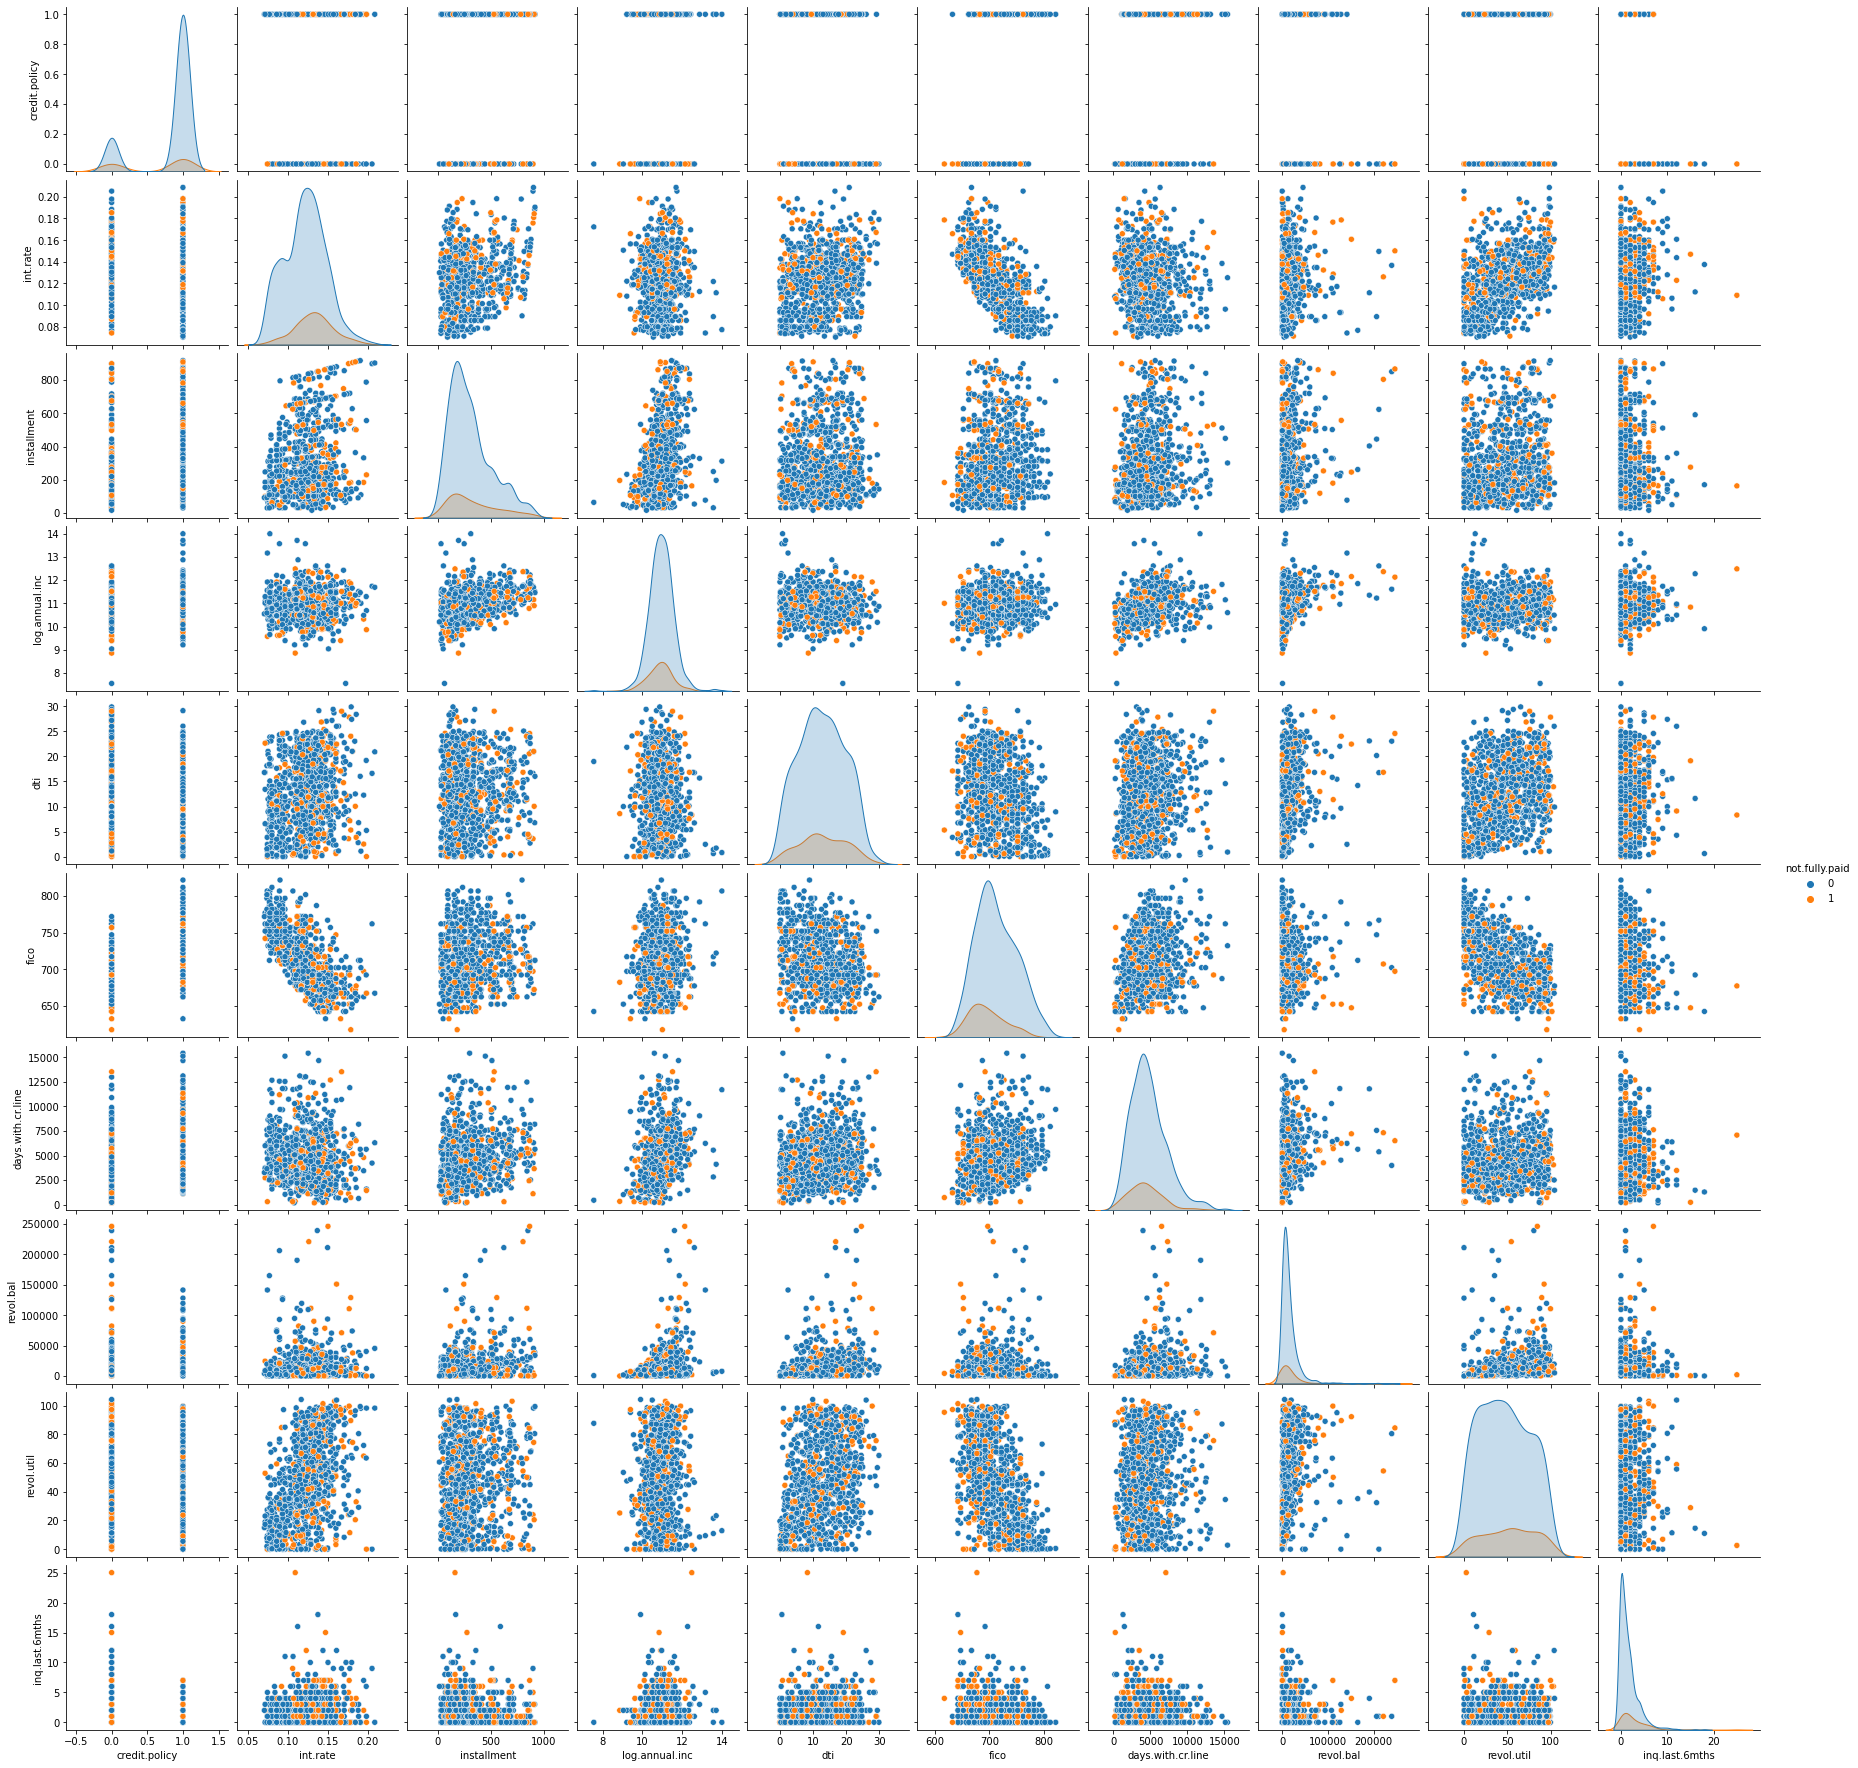

In [3]:
sns.pairplot(data=df.sample(1000), hue="not.fully.paid")

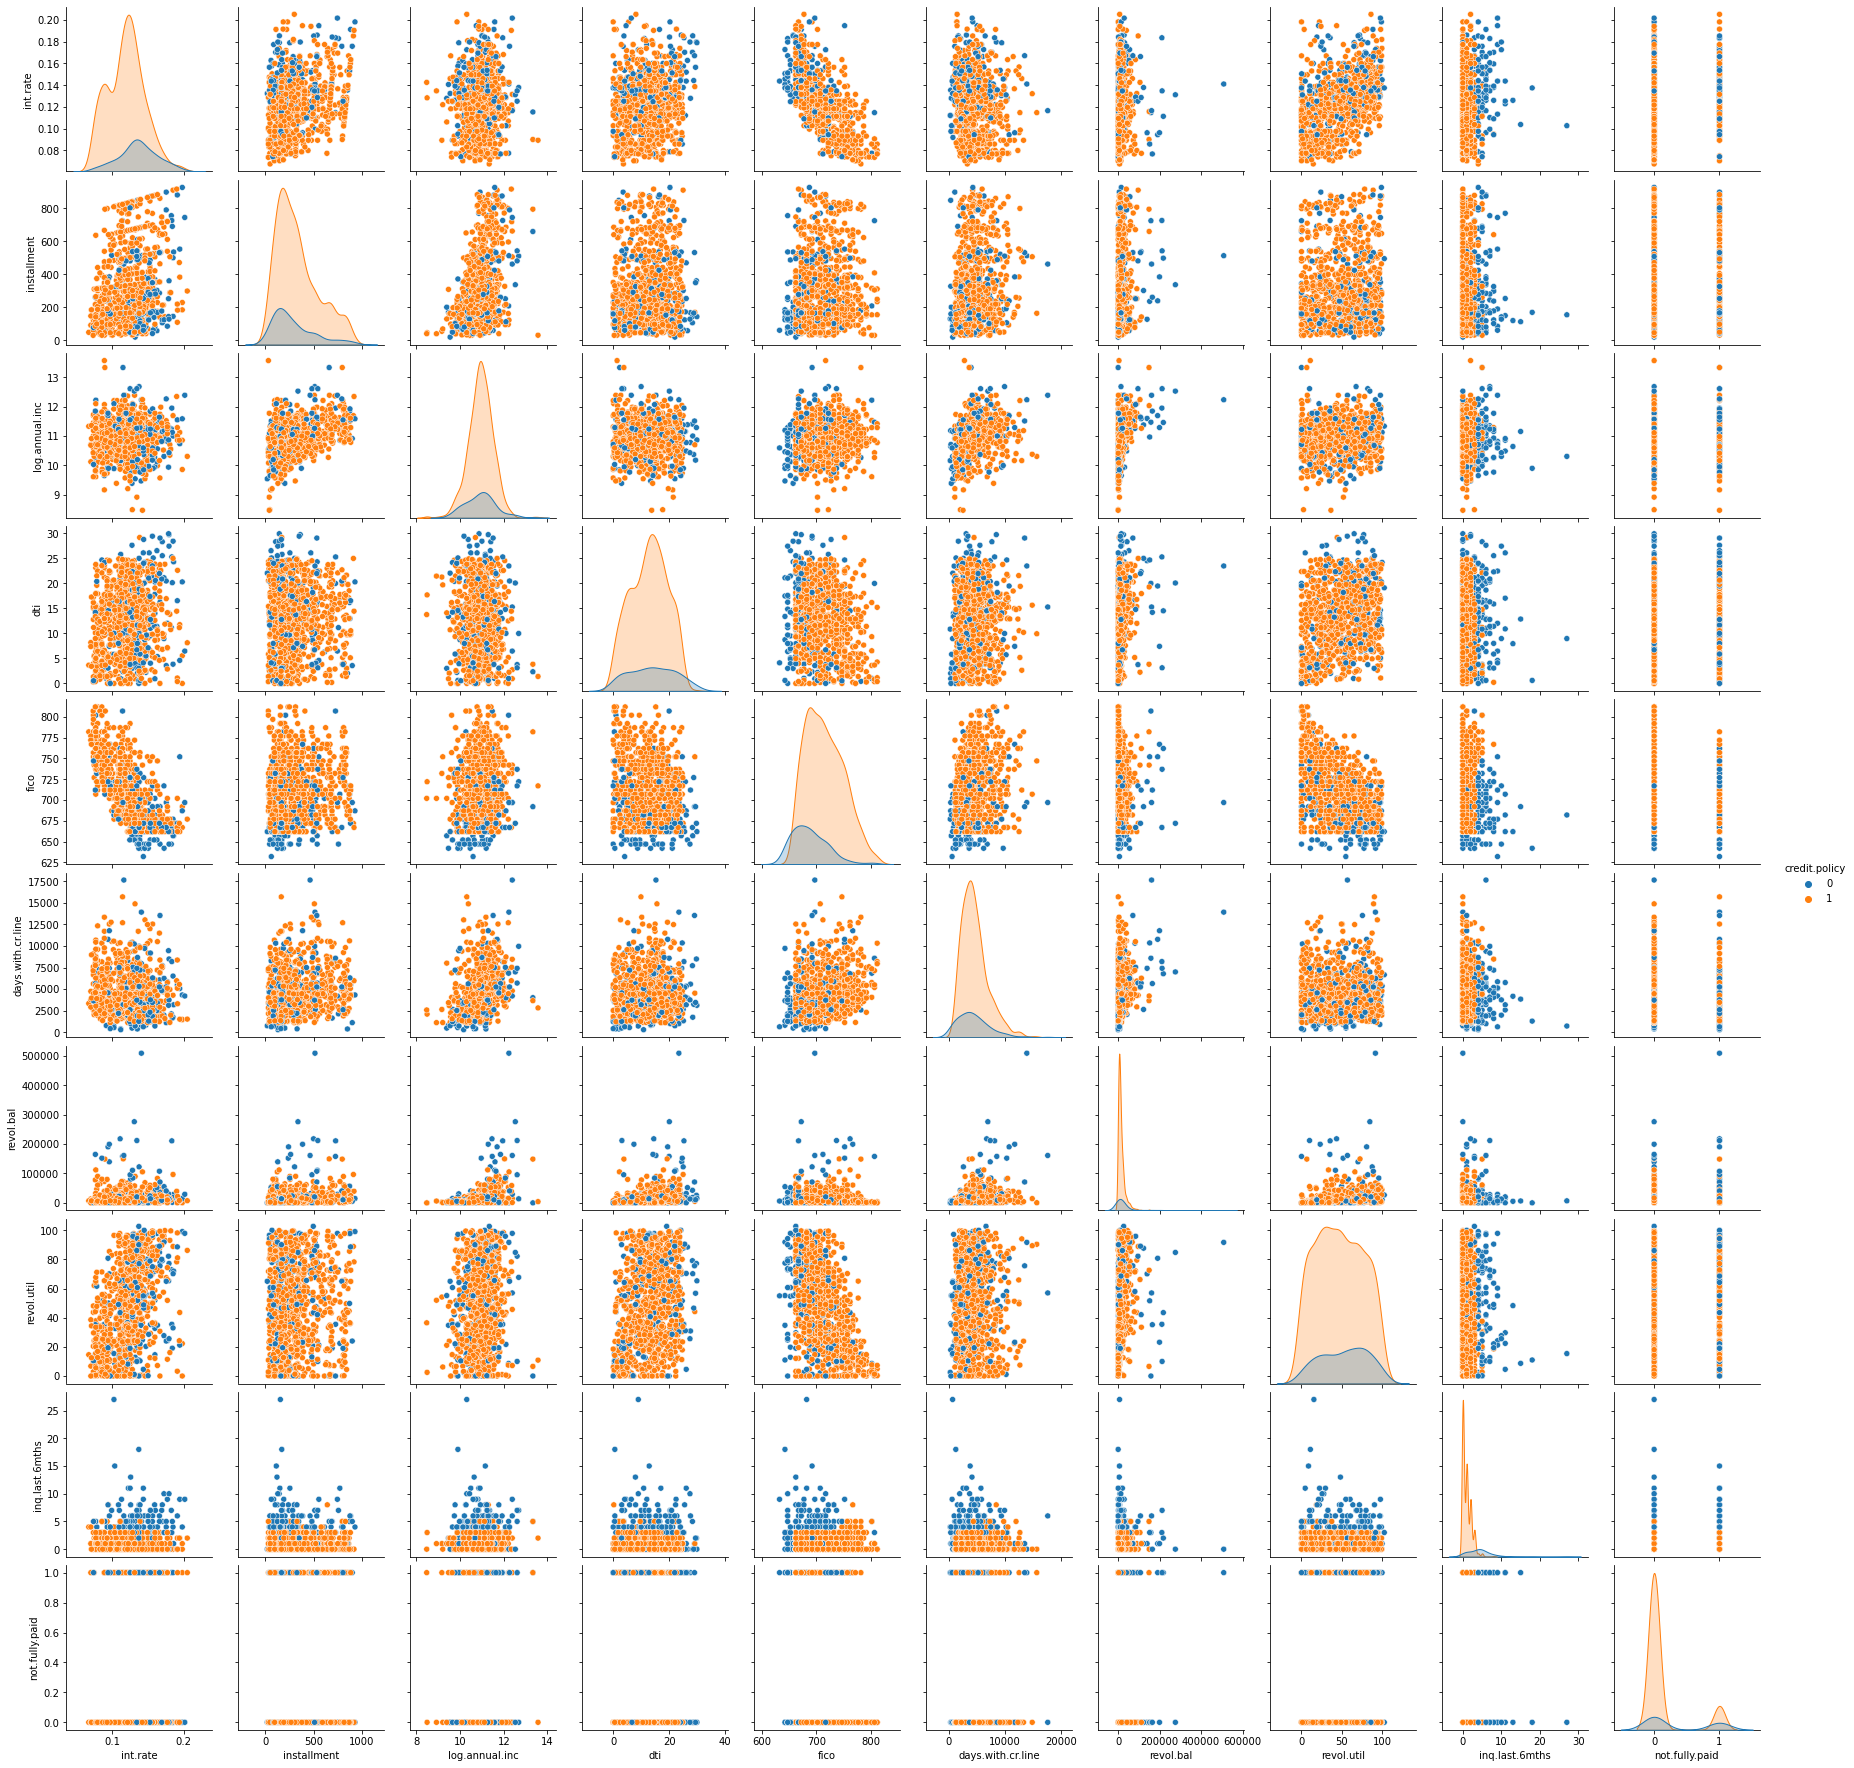

In [4]:
sns.pairplot(data=df.sample(1000), hue="credit.policy")

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,1.000000


### Questions

##### Difference in Fico
<ol>
<li> Difference in Fico - split by repayment. 
<li> Difference in Fico - split by rating.
</ol>

In [6]:
df_cr_1 = df[df["credit.policy"] == 1]
df_cr_0 = df[df["credit.policy"] == 0]

df_nfp_1 = df[df["not.fully.paid"] == 1]
df_nfp_0 = df[df["not.fully.paid"] == 0]

<AxesSubplot:xlabel='fico', ylabel='Density'>

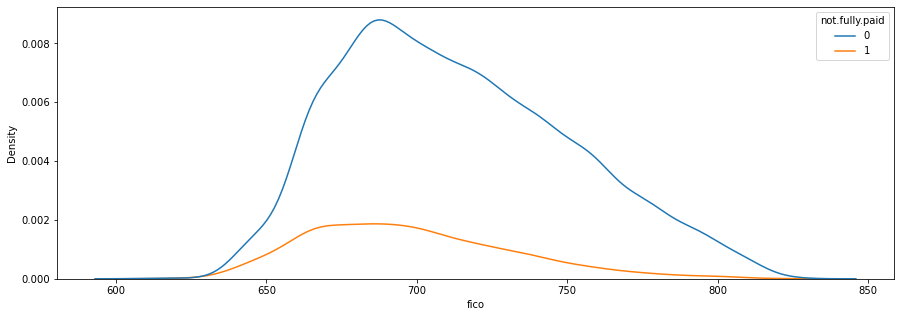

In [7]:
## Part 1
sns.kdeplot(data=df, x="fico", hue="not.fully.paid")

In [8]:
stat1, pval1 = ss.ttest_ind(df_nfp_1["fico"], df_nfp_0["fico"])
pval1

4.227100096647354e-49

<AxesSubplot:xlabel='fico', ylabel='Density'>

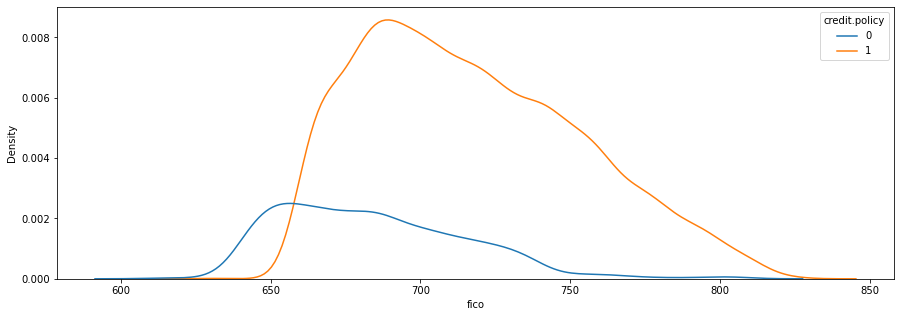

In [9]:
## Part 2
sns.kdeplot(data=df, x="fico", hue="credit.policy")

In [10]:
stat2, pval2 = ss.ttest_ind(df_cr_1["fico"], df_cr_0["fico"])
pval2

2.6100416830751396e-271

##### Power

<ol>
<li> Is there evidence that people who are rated "credit unworthty" (credit.policy = 0) have a lower income than people who are rated worhty(credit.policy = 1)?
<li> What is the power of this determination?
<li> Suppose we hit a problem with our funding, and we need to collect less data. How many observations do we need to maintain a power of .85?
</ol> 

<AxesSubplot:xlabel='log.annual.inc', ylabel='Density'>

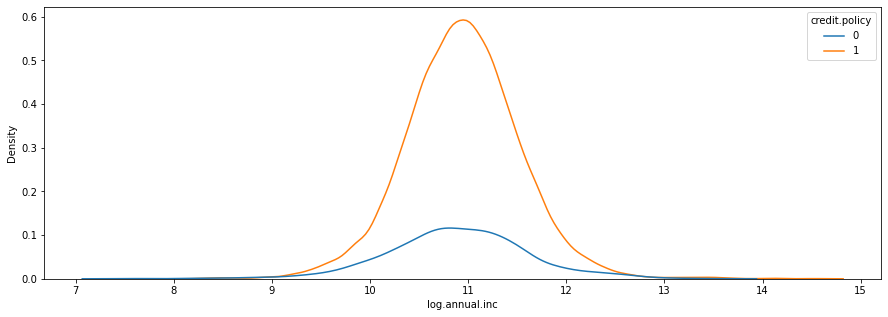

In [11]:
## 
sns.kdeplot(data=df, x="log.annual.inc", hue="credit.policy")

In [12]:
stat3, pval3 = ss.ttest_ind(df_cr_1["log.annual.inc"], df_cr_0["log.annual.inc"], alternative="greater")
pval3

0.00031686620860062984

In [13]:
#Statsmodels calculation of power. 
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(df_cr_1["log.annual.inc"],df_cr_0["log.annual.inc"])
alpha = .05
nobs = df["log.annual.inc"].count()

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

(1.0, 0.08813984185782714)

In [14]:
# Obvs Needed
n = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
n

1157.6455504969408

##### Stats on Income

<ol>
<li> What is the median income?
<li> What is the mean income?
<li> What is the Pearson Medain Skewness of the income distribution?
</ol>

In [15]:
df["raw_income"] = np.exp(df["log.annual.inc"])
print(df["raw_income"].median())
print(df["raw_income"].mean())

55763.99997288616
68402.03071015503


In [16]:
# skew
print(thinkstats2.Skewness(df["raw_income"]))
print(thinkstats2.Skewness(df["days.with.cr.line"]))
print(thinkstats2.Skewness(df["fico"]))

print(thinkstats2.PearsonMedianSkewness(df["raw_income"]))
print(thinkstats2.PearsonMedianSkewness(df["days.with.cr.line"]))
print(thinkstats2.PearsonMedianSkewness(df["fico"]))

9.592046489493303
1.1555672187692276
0.47118593325417624
0.6210290601166143
0.5056178217400077
0.30390788935426843


##### ANOVA
<ol>
<li> Does it appear that there is a difference in the interest rates between the different credit rating groups?
<li> Does it appear that there is a difference in income beteewn the different credit rating groups?
</ol>

![FICO](fico_range.png "FICO Ranges")

In [17]:
#poor = df[df["fico"] <= 579]["fico"]
#fair = df[ (df["fico"] >= 580) & (df["fico"] <= 669) ]["fico"]
#good = df[ (df["fico"] >= 670) & (df["fico"] <= 739) ]["fico"]
#vgood = df[ (df["fico"] >= 740) & (df["fico"] <= 799) ]["fico"]
#excep = df[ (df["fico"] >= 800)]["fico"]

In [18]:
use = "log.annual.inc"

poor = df[df["fico"] <= 579][use]
fair = df[ (df["fico"] >= 580) & (df["fico"] <= 669) ][use]
good = df[ (df["fico"] >= 670) & (df["fico"] <= 739) ][use]
vgood = df[ (df["fico"] >= 740) & (df["fico"] <= 799) ][use]
excep = df[ (df["fico"] >= 800)][use]

In [19]:
print(np.var(fair))
print(np.var(good))
print(np.var(vgood))
print(np.var(excep))

print(np.mean(fair))
print(np.mean(good))
print(np.mean(vgood))
print(np.mean(excep))


0.37110132084728337
0.37516898183208586
0.3651677490261867
0.4531585096625705
10.820247256673321
10.923275683115142
11.009605852758222
11.218766504682756


In [20]:
#First, test for vars being equal-ish
varStat, varP = ss.levene(#poor,
               fair,
               good,
               vgood,
               excep
                )
varP

0.3957588838523943

In [21]:
fstat, p_anova = ss.f_oneway(#poor,
               fair,
               good,
               vgood,
               excep
                )
fstat, p_anova

(37.177011948803724, 7.052161427262523e-24)

##### Regression

<ol>
<li> For this question please don't split the data if you are doing a regression. 
<li> Which appears to be a better predictor of credit score?
    <ol>
    <li> Income. 
    <li> Interest Rate. 
    <li> Utilization (revol.util)
    </ol>
</li>

In [22]:
print(thinkstats2.Corr(np.exp(df["log.annual.inc"]), df["fico"]), thinkstats2.Corr(np.exp(df["log.annual.inc"]), df["fico"])**2)
print(thinkstats2.Corr(df["log.annual.inc"], df["fico"]),thinkstats2.Corr(df["log.annual.inc"], df["fico"])**2)
print(thinkstats2.Corr(df["int.rate"], df["fico"]),thinkstats2.Corr(df["int.rate"], df["fico"])**2)
print(thinkstats2.Corr(df["revol.util"], df["fico"]),thinkstats2.Corr(df["revol.util"], df["fico"])**2)

0.08619377296447175 0.007429366497850902
0.1145759527247931 0.013127648942794022
-0.7148207714193595 0.5109687352525683
-0.5412893350075602 0.2929941441929267


##### Borrower Distribution

<ol>
<li> Does the distribution of borrowers in the empirical data appear to match the distribution in the FICO expectations? 
<li> State (in about a sentence or two) how you made that determination. 
</ol>

In [23]:
total = df["fico"].count()

print(poor.count(), fair.count(), good.count(), vgood.count(), excep.count())
print(total)

observed = [poor.count()/total, fair.count()/total, good.count()/total, vgood.count()/total, excep.count()/total]
expected = [.16, .17, .21, .25, .21]

print(observed)
print(expected)


0 1341 6007 2085 145
9578
[0.0, 0.14000835247442053, 0.6271664230528294, 0.21768636458550847, 0.015138859887241595]
[0.16, 0.17, 0.21, 0.25, 0.21]


In [24]:
ss.chisquare(observed, expected)

Power_divergenceResult(statistic=1.1789854183016903, pvalue=0.8815462645108314)